In [1]:
import os
os.sys.path.append(os.path.dirname(os.path.abspath('.')))

# 数据准备

In [2]:
from model_selection.train_test_split import train_test_split
from preprocessing.StandardScaler import StandardScaler
from datasets.dataset import load_wine

data = load_wine()
X, Y = data.data, data.target

X = StandardScaler().fit_transform(X)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

# print(X_train.shape,Y_train.shape)

# 模型基础
首先计算各个类别的均值向量与整体数据的均值向量。

In [3]:
import numpy as np
n_samples, n_features = X_train.shape

mu = np.mean(X_train, axis=0)    # 数据均值，向量

mu_k = list()    # 类均值向量，(K,n_feature)
for k in np.unique(Y_train):
    mu_k.append(np.mean(X_train[Y_train == k], axis=0))
mu_k = np.array(mu_k)

# print(mu.shape,mu_k.shape)

类内散度矩阵与类间散度矩阵：

In [4]:
n_k = list()    # 类别计数

S_w = np.zeros((n_features, n_features))    # 类内散度矩阵
for k in np.unique(Y_train):
    n_k.append(len(X_train[Y_train == k]))
    tmp = X_train[Y_train == k]-mu_k[k]
    S_w += np.dot(tmp.T, tmp)

S_b = np.dot(n_k*(mu_k-mu).T, (mu_k-mu))    # 类间散度矩阵

接下来的任务就是要找到映射方向，使得类间散度最大而类内散度最小。类似于PCA的原理，可以通过对$S_{w}^{-1}S_{b}$做特征值分解，最大特征值对应的特征向量即满足要求的映射方向。

In [5]:
eigval, eigvec = np.linalg.eig(np.dot(np.linalg.inv(S_w),
                                      S_b))    # 注意特征值与特征向量可能出现复数情况
top_idx = np.argsort(eigval)[::-1]    # 特征值的排序索引
top_vec = eigvec[:, top_idx[:2]]    # 取前两个特征向量

X_trans = np.dot(X_train, top_vec.real)    # 只取特征向量的实部做运算

In [6]:
import matplotlib.pyplot as plt

plt.scatter(X_trans[:, 0], X_trans[:, 1], c=Y_train)
plt.show()

<Figure size 640x480 with 1 Axes>

## 对比sklearn中的LDA降维变换

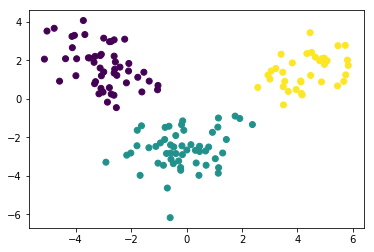

In [7]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis(n_components=2)
X_trans = lda.fit_transform(X_train, Y_train)

plt.scatter(X_trans[:, 0], X_trans[:, 1], c=Y_train)
plt.show()